# Self borrowing activity on Compound V2

This notebook intends to illustrate the correlation between self-borrowing and the incentives intern to the protocol. 

In [2]:
import altair as alt
alt.data_transformers.disable_max_rows()
import pandas as pd


liability = pd.read_csv('../data/balance_sheets/daily_liability_matrix.csv') # Load market price data
liability

,symbol_bor,symbol_col,account,matchBorrowUSD,matchCollateralUSD,effectiveUSD,date
0,cBAT,cBAT,1,1.028105e+01,1.763471e+02,1.028105e+01,2019-05-07
1,cBAT,cETH,2,1.895208e+01,3.152674e+02,1.895208e+01,2019-05-07
2,cBAT,cREP,1,2.004187e+00,3.437709e+01,2.004187e+00,2019-05-07
3,cBAT,cSAI,1,2.686493e+01,4.608043e+02,2.686493e+01,2019-05-07
4,cBAT,cUSDC,1,8.139770e+00,1.396185e+02,8.139770e+00,2019-05-07
...,...,...,...,...,...,...,...
209063,cZRX,cUSDC,48,1.068964e+05,1.503970e+06,1.068959e+05,2023-07-31
209064,cZRX,cWBTC,15,1.554430e+02,4.561121e+02,1.547590e+02,2023-07-31
209065,cZRX,cWBTC2,12,1.970710e+02,3.269187e+02,1.953021e+02,2023-07-31
209066,cZRX,cYFI,1,8.481281e-10,1.729400e-05,8.481281e-10,2023-07-31


In [3]:
self_borrow = liability[liability['symbol_bor'] == liability['symbol_col']].reset_index().drop('symbol_col', axis=1)
self_borrow

,index,symbol_bor,account,matchBorrowUSD,matchCollateralUSD,effectiveUSD,date
0,0,cBAT,1,1.028105e+01,1.763471e+02,1.028105e+01,2019-05-07
1,7,cETH,1,4.655172e+01,7.984846e+02,4.655172e+01,2019-05-07
2,14,cREP,1,5.968725e-01,1.023794e+01,5.968725e-01,2019-05-07
3,21,cSAI,1,8.015008e+01,1.374785e+03,8.015008e+01,2019-05-07
4,28,cUSDC,1,1.211813e+01,2.078579e+02,1.211813e+01,2019-05-07
...,...,...,...,...,...,...,...
14872,208989,cUSDC,424,3.926036e+07,8.587211e+07,3.926026e+07,2023-07-31
14873,209028,cWBTC,26,6.120590e+02,1.448418e+03,6.101344e+02,2023-07-31
14874,209041,cWBTC2,23,6.802807e+05,1.062553e+06,6.802807e+05,2023-07-31
14875,209054,cYFI,2,3.216983e+00,5.745345e+00,3.216983e+00,2023-07-31


In [4]:

daily_pools = self_borrow.groupby(['symbol_bor', 'date']).sum().reset_index()
daily_pools

,symbol_bor,date,index,account,matchBorrowUSD,matchCollateralUSD,effectiveUSD
0,cAAVE,2021-08-19,60189,1,2489.868402,6224.671004,2489.868402
1,cAAVE,2021-08-20,60356,1,2722.808655,6805.843010,2722.808655
2,cAAVE,2021-08-21,60524,1,4610.444347,11525.155716,4610.444347
3,cAAVE,2021-08-22,60697,1,4503.303663,11255.177213,4503.303663
4,cAAVE,2021-08-23,60870,1,4627.488659,11563.982738,4627.488659
...,...,...,...,...,...,...,...
14872,cZRX,2023-07-27,208167,28,52935.397436,641694.453112,52935.397431
14873,cZRX,2023-07-28,208392,28,52933.375206,641689.753783,52933.375201
14874,cZRX,2023-07-29,208617,28,52931.189305,641687.806921,52931.189300
14875,cZRX,2023-07-30,208842,28,52933.307208,641690.207267,52933.307203


In [5]:
alt.Chart(daily_pools[daily_pools['symbol_bor'].isin(['cUSDC', 'cCOMP', 'cDAI', 'cETH', 'cZRX', 'cWBTC2'])]).mark_bar().encode(
    x='date:T',
    y='matchBorrowUSD',
    color='symbol_bor'
).interactive()

alt.Chart(...)

Little historical view regarding the rewards:

- **June 15th, 2020**: Every Ethereum block, 0.50 COMP will be distributed across ETH, DAI, USDC, USDT, BAT, REP, WBTC and ZRX markets

- **June 27th, 2020**: Lower the number of distributed COMP to 0.44

- **August 31st, 2020**: Reduce COMP emissions by 20%

- **October 17th, 2020**: Add COMP Support

- **September 29th, 2021**: two different COMP distribution rates for each and every market - borrow-side rate and supply-side rate.

- **November 12th, 2021**: End cCOMP Borrow Rewards

- **March 27th, 2022**: the governance has voted to cut the existing rewards by 50%

- **June 29th, 2023**: Top-up COMP Rewards

# COMP Price

In [6]:
comp = pd.read_csv('../data/COMP_USD.csv', sep=';')

comp

,timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,timestamp
0,2024-02-08T00:00:00.000Z,2024-02-08T23:59:59.999Z,2024-02-08T23:19:00.000Z,2024-02-08T12:53:00.000Z,2781,53.210016,54.087003,53.195422,53.991065,27736555.03,4.357963e+08,2024-02-08T23:59:59.999Z
1,2024-02-07T00:00:00.000Z,2024-02-07T23:59:59.999Z,2024-02-07T20:50:00.000Z,2024-02-07T08:14:00.000Z,2781,52.522981,53.555882,52.007126,53.210343,27746092.59,4.294929e+08,2024-02-07T23:59:59.999Z
2,2024-02-06T00:00:00.000Z,2024-02-06T23:59:59.999Z,2024-02-06T13:55:00.000Z,2024-02-06T14:16:00.000Z,2781,52.186594,53.102701,52.098893,52.523693,31031166.03,4.239104e+08,2024-02-06T23:59:59.999Z
3,2024-02-05T00:00:00.000Z,2024-02-05T23:59:59.999Z,2024-02-05T13:40:00.000Z,2024-02-05T01:16:00.000Z,2781,53.479430,53.512569,52.058446,52.185942,30687682.36,4.211833e+08,2024-02-05T23:59:59.999Z
4,2024-02-04T00:00:00.000Z,2024-02-04T23:59:59.999Z,2024-02-04T00:05:00.000Z,2024-02-04T22:43:00.000Z,2781,54.883572,54.900357,53.094205,53.497120,38982054.06,4.317643e+08,2024-02-04T23:59:59.999Z
...,...,...,...,...,...,...,...,...,...,...,...,...
1328,2020-06-20T00:00:00.000Z,2020-06-20T23:59:59.999Z,2020-06-20T23:05:23.000Z,2020-06-20T09:05:36.000Z,2781,224.669304,264.110007,197.410857,258.911624,2030188.91,6.631449e+08,2020-06-20T23:59:59.999Z
1329,2020-06-19T00:00:00.000Z,2020-06-19T23:59:59.999Z,2020-06-19T11:32:23.000Z,2020-06-19T00:00:20.000Z,2781,143.393405,241.837628,143.393405,224.545206,2524624.30,5.751229e+08,2020-06-19T23:59:59.999Z
1330,2020-06-18T00:00:00.000Z,2020-06-18T23:59:59.999Z,2020-06-18T13:08:08.000Z,2020-06-18T13:56:05.000Z,2781,64.267031,176.594731,61.271270,148.669784,1443324.86,0.000000e+00,2020-06-18T23:59:59.999Z
1331,2020-06-17T00:00:00.000Z,2020-06-17T23:59:59.999Z,2020-06-17T06:07:19.000Z,2020-06-17T11:32:18.000Z,2781,93.266296,113.041062,61.593316,64.635640,175376.44,0.000000e+00,2020-06-17T23:59:59.999Z


In [7]:
alt.Chart(comp).mark_line().encode(
    x='timestamp:T',
    y='close:Q'
).interactive()

alt.Chart(...)

# Correlation Self-Borrow vs COMP price

In [19]:
from datetime import datetime

In [26]:
price = comp[comp['timestamp'] < '2023-07-31T23:59:59.999Z'].reset_index()[['timestamp', 'close']]
price['timestamp'] = price['timestamp'].apply(lambda date: datetime.strptime(date, '%Y-%m-%dT%H:%M:%S.%fZ'))

price

,timestamp,close
0,2023-07-30 23:59:59.999,71.036632
1,2023-07-29 23:59:59.999,72.280781
2,2023-07-28 23:59:59.999,72.094845
3,2023-07-27 23:59:59.999,70.095282
4,2023-07-26 23:59:59.999,70.692718
...,...,...
1135,2020-06-20 23:59:59.999,258.911624
1136,2020-06-19 23:59:59.999,224.545206
1137,2020-06-18 23:59:59.999,148.669784
1138,2020-06-17 23:59:59.999,64.635640


In [24]:
self_borrow = daily_pools[daily_pools['date'] > '2020-06-16'].groupby('date').sum().reset_index()[['date', 'matchBorrowUSD']]
self_borrow['date'] = self_borrow['date'].apply(lambda date: datetime.strptime(date, '%Y-%m-%d'))

self_borrow

,date,matchBorrowUSD
0,2020-06-17,2.916692e+04
1,2020-06-18,3.184466e+04
2,2020-06-19,4.753896e+04
3,2020-06-20,6.225126e+06
4,2020-06-21,3.527259e+07
...,...,...
1135,2023-07-27,1.336131e+08
1136,2023-07-28,1.352411e+08
1137,2023-07-29,1.354130e+08
1138,2023-07-30,1.344180e+08


In [31]:
reg = pd.merge(price, self_borrow, left_on=price['timestamp'].dt.date, right_on=self_borrow['date'].dt.date)
reg

,key_0,timestamp,close,date,matchBorrowUSD
0,2023-07-30,2023-07-30 23:59:59.999,71.036632,2023-07-30,1.344180e+08
1,2023-07-29,2023-07-29 23:59:59.999,72.280781,2023-07-29,1.354130e+08
2,2023-07-28,2023-07-28 23:59:59.999,72.094845,2023-07-28,1.352411e+08
3,2023-07-27,2023-07-27 23:59:59.999,70.095282,2023-07-27,1.336131e+08
4,2023-07-26,2023-07-26 23:59:59.999,70.692718,2023-07-26,1.338010e+08
...,...,...,...,...,...
1134,2020-06-21,2020-06-21 23:59:59.999,337.047035,2020-06-21,3.527259e+07
1135,2020-06-20,2020-06-20 23:59:59.999,258.911624,2020-06-20,6.225126e+06
1136,2020-06-19,2020-06-19 23:59:59.999,224.545206,2020-06-19,4.753896e+04
1137,2020-06-18,2020-06-18 23:59:59.999,148.669784,2020-06-18,3.184466e+04


Pearson Correlation Coefficient: 0.8356345616894456
                            OLS Regression Results                            
Dep. Variable:         matchBorrowUSD   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     2631.
Date:                Fri, 09 Feb 2024   Prob (F-statistic):          4.00e-298
Time:                        17:33:08   Log-Likelihood:                -25171.
No. Observations:                1139   AIC:                         5.035e+04
Df Residuals:                    1137   BIC:                         5.036e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


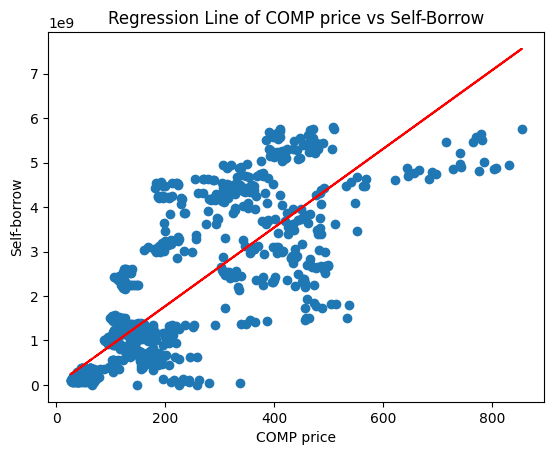

In [32]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

x = reg['close']
y = reg['matchBorrowUSD']


# Step 3: Correlation Analysis
correlation_matrix = np.corrcoef(x, y)
correlation_coefficient = correlation_matrix[0, 1]
print(f'Pearson Correlation Coefficient: {correlation_coefficient}')

# Step 4: Simple Linear Regression
x = sm.add_constant(x)  # Add a constant term to the predictor
model = sm.OLS(y, x).fit()

# Print regression results
print(model.summary())

# Visualize Regression Line
plt.scatter(x.iloc[:, 1], y)
plt.plot(x.iloc[:, 1], model.predict(x), color='red')
plt.xlabel('COMP price')
plt.ylabel('Self-borrow')
plt.title('Regression Line of COMP price vs Self-Borrow')
plt.show()